In [ ]:
#3 Major take-aways from the data

#Max temperature correlated with distance from the equator for both hemispheres. This was expected.

#Most of the data found trended towards coastal cities. This was a function of the random number generator used to find random coordinates on the graph, and the fact that the earth is majority water, thus the closest city would be coastal. This may affect certain relationships as oceanic weather may differ from inland. 

#There were relatively few cities with low humidity near the equator and most humidities were quite high. Again this is probably biased by the oceananic cities. Also not many cities in deserts near the equator. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from random import randrange
from datetime import datetime

from api_keys import g_key
from api_keys import weather_api_key

In [2]:
#Generate City List

#Initialize variables and url
num_city=550
url = "http://api.openweathermap.org/data/2.5/weather?"
city_list=pd.DataFrame({'City Name': [], 
                        'Lat': [], 
                        'Long': [],
                        'Max Temp': [], 
                        'Cloudiness': [],
                        'Humidity': [], 
                        'Wind Speed':[]})
country_val=[[]]*num_city
units='imperial'

#Run api loop for each city
for x in range(num_city):
    
    #keep trying this loop until a city is found
    isreal=0
    while isreal==0:
        #find random coordinates
        lat_rand=randrange(-89,89)
        long_rand=randrange(-179,179)
        #Find closest city
        city=citipy.nearest_city(lat_rand,long_rand)
        #Pause for api usage limit
        time.sleep(1.1)
        try:
            #force error if random city is already in list
            if x!=0:
                if city_list['City Name'].str.contains(city.city_name).sum()>0:
                    p=1/0
            try:
                #determine if city name is not found in weather
                city_list.at[x,'City Name']=city.city_name
                query_url = f"{url}appid={weather_api_key}&q={city.city_name}&units={units}"
                #Call for city name and place information
                weather_response = requests.get(query_url)
                weather_json = weather_response.json()
                country_val[x]=weather_json['sys']['country']
                city_list.at[x,'Lat']=weather_json['coord']['lat']
                city_list.at[x,'Long']=weather_json['coord']['lon']
                city_list.at[x,'Max Temp']=weather_json['main']['temp_max']
                city_list.at[x,'Cloudiness']=weather_json['clouds']['all']
                city_list.at[x,'Humidity']=weather_json['main']['humidity']
                city_list.at[x,'Wind Speed']=weather_json['wind']['speed']
                isreal=1
                print(f'City number {x+1} found: {city.city_name}')
            except:
                print('No City was Found.... Rerolling City')
        except:
            print('Found Same City... Rerolling City')
#Add country because it didn't like adding it before
city_list=city_list.join(pd.DataFrame({"Country":country_val}), how='outer')
#remove too humid values
city_list_too_humid=city_list.loc[city_list['Humidity']>=100].reset_index(drop=True)
city_list=city_list.loc[city_list['Humidity']<100].reset_index(drop=True)
#Save to list
city_list.to_csv('WeatherPy/city_data.csv',index=False)
city_list.head()

r 385 found: diamantina
City number 386 found: laibin
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
City number 387 found: coahuayana
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
City number 388 found: kalmunai
Found Same City... Rerolling City
Found Same City... Rerolling City
City number 389 found: custoias
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling City
Found Same City... Rerolling Cit

,City Name,Lat,Long,Max Temp,Cloudiness,Humidity,Wind Speed,Country
0,kamenka,51.32,42.77,56.95,55.0,43.0,10.11,RU
1,tocopilla,-22.09,-70.20,66.31,21.0,53.0,11.34,CL
2,san cristobal,7.77,-72.22,91.40,40.0,43.0,20.80,VE
3,lebu,-37.62,-73.65,51.17,0.0,68.0,18.21,CL
4,dikson,73.51,80.55,45.66,69.0,90.0,19.95,RU


In [3]:
#Find date/time
day=datetime.now().strftime("%d/%m/%Y %H:%M:%S")

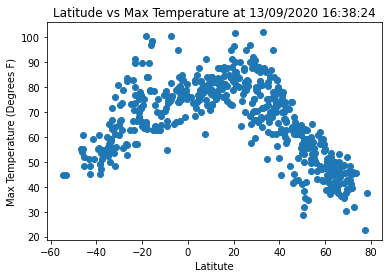

In [4]:
#Plot Data

#Plot Lat vs Temp
plt.scatter(city_list['Lat'],city_list['Max Temp'])
plt.title(f'Latitude vs Max Temperature at {day}')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')
plt.savefig('WeatherPy/LatvsTemp.png')
plt.show()

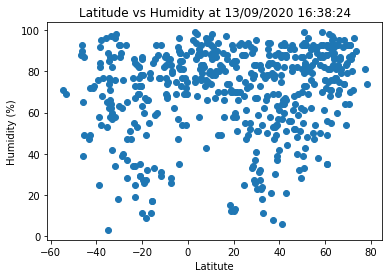

In [5]:
#Plot Lat vs Humidity
plt.scatter(city_list['Lat'],city_list['Humidity'])
plt.title(f'Latitude vs Humidity at {day}')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')
plt.savefig('WeatherPy/LatvsHumidity.png')
plt.show()

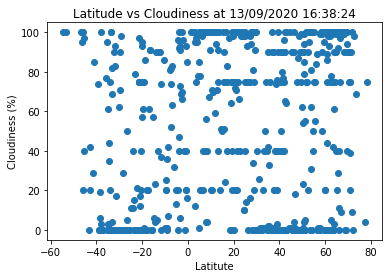

In [6]:
#Plot Lat vs Cloudiness
plt.scatter(city_list['Lat'],city_list['Cloudiness'])
plt.title(f'Latitude vs Cloudiness at {day}')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')
plt.savefig('WeatherPy/LatvsCloudiness.png')
plt.show()

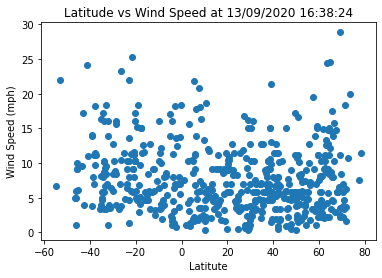

In [7]:
#Plot Lat vs Wind Speed
plt.scatter(city_list['Lat'],city_list['Wind Speed'])
plt.title(f'Latitude vs Wind Speed at {day}')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')
plt.savefig('WeatherPy/LatvsWindSpeed.png')
plt.show()

In [8]:
#Generate north and south dataframes
city_list_n=city_list.loc[city_list['Lat']>=0]
city_list_s=city_list.loc[city_list['Lat']<0]

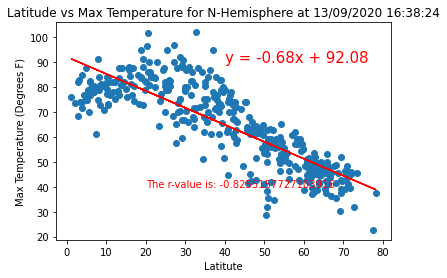

In [9]:
#Plot Lat vs Temp for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Max Temp'])
plt.title(f'Latitude vs Max Temperature for N-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Max Temp'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,90),fontsize=15,color="red")
plt.annotate(r_string,(20,40),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsTemp_north.png')
plt.show()

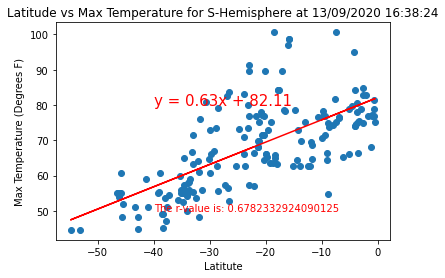

In [10]:
#Plot Lat vs Temp for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Max Temp'])
plt.title(f'Latitude vs Max Temperature for S-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Max Temp'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.annotate(r_string,(-40,50),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsTemp_south.png')
plt.show()

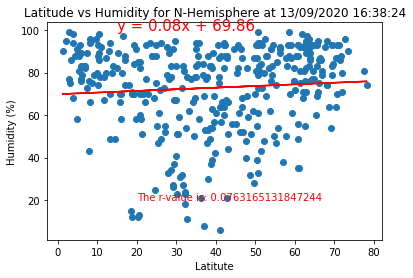

In [11]:
#Plot Lat vs Humidity for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Humidity'])
plt.title(f'Latitude vs Humidity for N-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Humidity'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,100),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsHumidity_north.png')
plt.show()

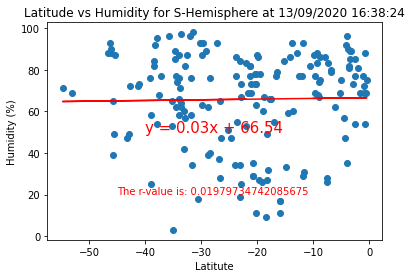

In [12]:
#Plot Lat vs Humidity for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Humidity'])
plt.title(f'Latitude vs Humidity for S-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Humidity'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.annotate(r_string,(-45,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsHumidity_south.png')
plt.show()

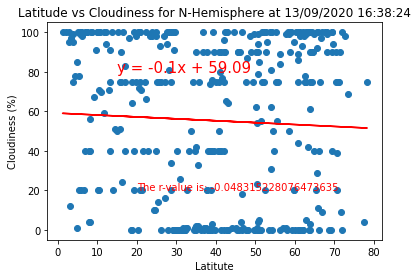

In [13]:
#Plot Lat vs Cloudiness for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Cloudiness'])
plt.title(f'Latitude vs Cloudiness for N-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Cloudiness'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,80),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsCloudiness_north.png')
plt.show()

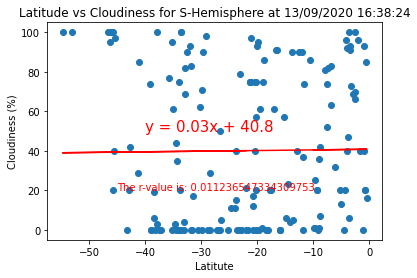

In [14]:
#Plot Lat vs Cloudiness for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Cloudiness'])
plt.title(f'Latitude vs Cloudiness for S-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Cloudiness'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.annotate(r_string,(-45,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsCloudiness_south.png')
plt.show()

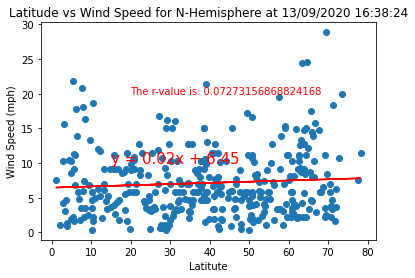

In [15]:
#Plot Lat vs Wind Speed for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Wind Speed'])
plt.title(f'Latitude vs Wind Speed for N-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Wind Speed'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsWindSpeed_north.png')
plt.show()

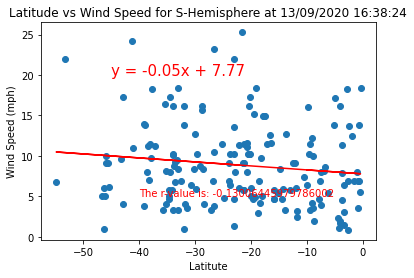

In [16]:
#Plot Lat vs Wind Speed for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Wind Speed'])
plt.title(f'Latitude vs Wind Speed for S-Hemisphere at {day}')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Wind Speed'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.annotate(r_string,(-40,5),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsWindSpeed_south.png')
plt.show()